# Project 2: Ames Iowa Real Estate Analysis

## Problem Statement: 
The purpose of this project is to create a regression model, based on the Ames Housing Dataset, towards the goal of predicting the price of a house at sale. We construct different types of regression models, such as Ordinary Least Squares, Ridge, and Lasso and measure their performance with the R^2 metric for both train and test sets as well as the cross validation score. At the end of this project, we'd like to be able to tell real estate agents which features predict the sale price of a house well and how to interpret it. We caution that as soon as the models and transforms become more complex, it's harder to interpret. However, for the sake of this project, we will still perform certain transformations.

## Executive Summary

### Table of Contents:
- [The Data](#The-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Brief Summary of EDA](#Brief-Summary-of-EDA)
- [Model 1: Linear Regression with Numerical Variables and log(SalePrice)](#Model-1:-Linear-Regression-with-Numerical-Variables-and-log(SalePrice))
- [Model 2: Linear Regression with Numerical and Categorical Variables with log(SalePrice)](#Model-2:-Linear-Regression-with-Numerical-and-Categorical-Variables-with-log(SalePrice))
- [Model 3: Polynomial Terms](#Model-3:-Polynomial-Terms)
- [Model 4: Ridge Regression](#Model-4:-Ridge-Regression)
- [Model 5: Lasso Regression](#Model-5:-Lasso-Regression)
- [Final Model and Interpretation](#Final-Model-and-Interpretation)
- [Kaggle Competition](#Kaggle-Competition)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

All libraries and modules used:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict
import statsmodels.api as sm
import random 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


%matplotlib inline

## The Data

The data is from Kaggle. Here is the link. 
https://www.kaggle.com/c/dsi-us-10-project-2-regression-challenge/data

<b> 1. Read in the data

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv') 

<b> 2. Taking a look at the data's shape and features

In [3]:
#We only used the 'test' dataset for submitting to Kaggle so will only explore the 'train' dataset
train.shape

(2051, 81)

We see that we have 2,051 observations with 81 features.

In [4]:
#Showing the top couple rows
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Briefly, looking at the first couple rows of data that we have, we can see that the columns represent attributes of a house. We have numerical and categorical features, we have some missing values, and we have zeros. We will use 'SalePrice' as the target feature that we try to predict for with our model.

<b> 3. Correct data types? Missing values?

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

The information about each data type of our features tells us that the dataset is not complete. There are some variables that only have a couple entries (ie. Pool QC) and some that we might want to dummy eventually. Next we take a look at the descriptives of the dataset to check that they have valid min and max values.

In [6]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Nothing really jumps out that seems 'wrong' so we will leave this for now. 

## Exploratory Data Analysis

<b> 1. Our target variable - SalePrice

In [7]:
print(train['SalePrice'].min())
#house with minimum sale price
display(train.loc[1628,['Neighborhood', 'Mo Sold', 'Year Built', 'Garage Cars', 'Lot Frontage','Yr Sold']])

print(train['SalePrice'].max())
#house with maximum sale price
display(train.loc[1671,['Neighborhood', 'Mo Sold', 'Year Built', 'Garage Cars', 'Lot Frontage','Yr Sold']])

12789


Neighborhood    OldTown
Mo Sold               6
Year Built         1923
Garage Cars           2
Lot Frontage         68
Yr Sold            2010
Name: 1628, dtype: object

611657


Neighborhood    NridgHt
Mo Sold               3
Year Built         2009
Garage Cars           3
Lot Frontage        100
Yr Sold            2010
Name: 1671, dtype: object

We first simply look at the minimum and maximum sale prices. The least expensive house that sold was for 12,789 dollars in 2010 in Old Town. The most expensive house that sold was for 611,657 dollars also in 2010 in N. Ridge Height. It's interesting to see that they sold in the same year, which implies that we might not have to worry about economic inflation. 

One of the first things that we should look at when making a model is to look at the distribution of our target. The following plot shows that SalePrice is not normally distributed. It's pretty right skewed which suggest that we might want to log transform it when modeling.

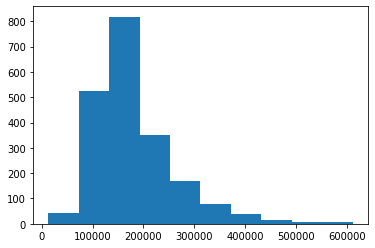

In [8]:
plt.hist(train['SalePrice']);

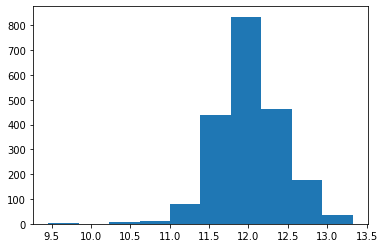

In [9]:
#log transform of SalePrice
plt.hist(np.log(train['SalePrice']));

We see that this transform helps SalePrice to look a lot more normally distributed. Because of this, we will probably use this for modeling.

<b> 2. The predictors

Because we have 80 + variables, in order to make exploratory data analysis more efficient, I've manually scanned through the data dictionary and chose which categorical features might be important. For numerical features, I produce the correlation heat map to show which ones we might want to keep for modeling

<b> a. 'Categorical' Variables

<b> Year Sold

In [10]:
#Looking to see if Year Sold is distributed relatively evenly
train['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

We see that in years 2006-2009, we have about the same number of observations. However, in 2010 there's about half as many as any one other year.

In [11]:
#looking at the mean of Sale Price for each year
train.groupby('Yr Sold')['SalePrice'].mean()

Yr Sold
2006    179471.609589
2007    185524.514056
2008    181750.372414
2009    182455.244395
2010    174180.059829
Name: SalePrice, dtype: float64

These values tell us that there isn't much difference between the years. We will most likely not keep this feature in our model

<b> Year Built

In [12]:
#Looking to see if Year Built is distributed relatively evenly
train['Year Built'].value_counts()

2005    102
2006     99
2007     78
2004     72
2003     64
       ... 
1911      1
1893      1
1885      1
1879      1
1872      1
Name: Year Built, Length: 113, dtype: int64

This output tells us that our data covers 113 years. There are some years that only have 1 house sold, and some that have over 100. This will probably skew the data.

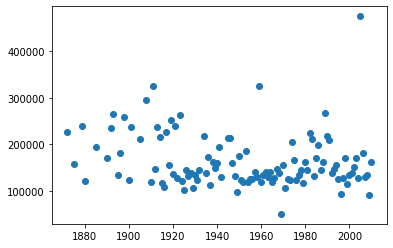

In [13]:
plt.scatter(train['Year Built'].unique(),(train.groupby('Year Built')['SalePrice'].mean()));

The above plot shows that for most years, the mean is around a sale's price between 100,000 and 300,000. We notice one year has a very high sale price mean, looking like an outlier that we might want to remove.

<b> Month Sold

In [14]:
#Looking to see if Month Sold is distributed relatively evenly
train['Mo Sold'].value_counts()

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: Mo Sold, dtype: int64

Interestingly enough, we see that June and July have many houses sold whereas December and January don't have many relative to the other months. It might be better to try to sell a house in the former two months.

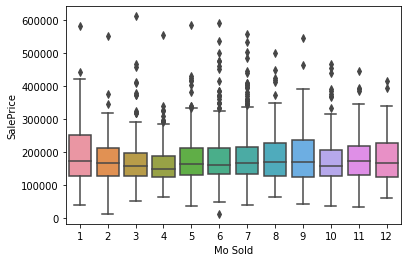

In [15]:
sns.boxplot(x='Mo Sold', y="SalePrice", data=train);

Examining this plot entails that Jan, Sept, and December have the widest IQR indicating that in these months the sales price ranges a lot more than the other months. Also, we see that the median sale's price for each month is about the same.

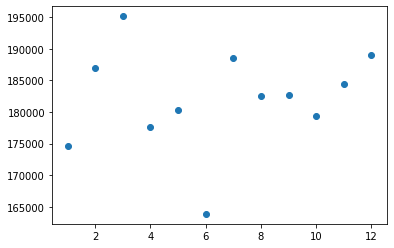

In [16]:
plt.scatter(train['Mo Sold'].unique(),(train.groupby('Mo Sold')['SalePrice'].mean()));

The above plot shows the mean sales price of each month. This looks scattered but is still in the range of around 165,000-195,000.

<b> House Style

In [17]:
#house style is widely distributed
train['House Style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

In [18]:
train.groupby('Neighborhood')['House Style'].value_counts()

Neighborhood  House Style
Blmngtn       1Story         22
Blueste       2Story          4
              1Story          2
BrDale        2Story         19
BrkSide       1.5Fin         39
                             ..
Timber        2Story          9
              SLvl            5
Veenker       1Story         13
              2Story          2
              SLvl            2
Name: House Style, Length: 99, dtype: int64

Just from a snippet of this output, we see that not all neighborhoods sold each type of house. The following plot shows this better with coloring each neighborhood by House Style.

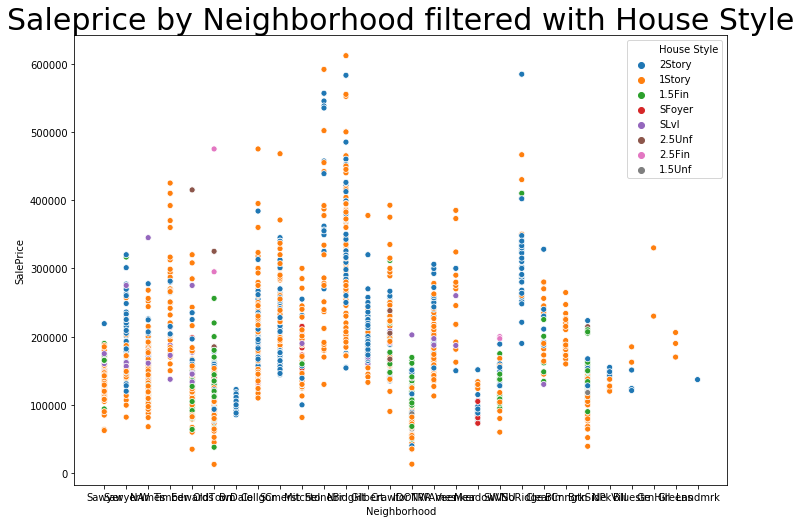

In [99]:
plt.figure(figsize = (15,7))
plt.title("Saleprice by Neighborhood filtered with House Style", fontsize = 30)

price_neigh_style = sns.scatterplot(train['Neighborhood'], train['SalePrice'], hue = train['House Style']);
fig1 = price_neigh_style.get_figure()
fig1.set_size_inches(11.7, 8.27)
fig1.savefig("../Plots/saleprice_neighborhood_housestyle.png")

This plot is an overview for each neighborhood, their sale prices, and the house style. Looking at one neighborhood, we can easily pick out the most expensive house and least expensive house as well as what type of house it is. It shows which house style is most 'popular' in each neighborhood and we can generally visualize the mean sale price of each neighborhood.

Because, the above plot shows each neighborhood, it looks a little busy. Therefore, below we sampled 5 random neighborhoods and plotted those. 

Randomly selected neighborhoods  ['Sawyer', 'Blmngtn', 'Gilbert', 'Gilbert', 'Crawfor']


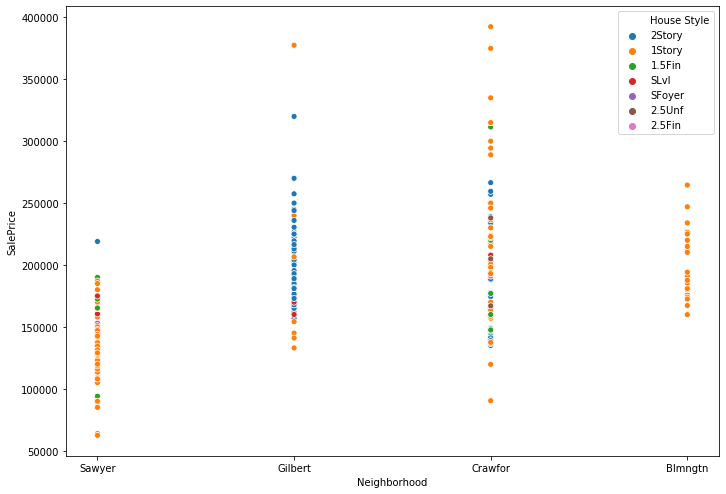

In [100]:
##### This visual is good but too busy so we choose 5 random neighborhoods...
neighborhood_sample = list(random.choices(train['Neighborhood'], k=5))
print("Randomly selected neighborhoods ", neighborhood_sample)

temp = train['Neighborhood']
mask = temp.isin(neighborhood_sample)

plt.figure(figsize = (7,10))
spec_neigh = sns.scatterplot(x = 'Neighborhood', y = 'SalePrice', hue = 'House Style', data = train[mask]);
fig2 = spec_neigh.get_figure()
fig2.set_size_inches(11.7, 8.27)
fig2.savefig("../Plots/saleprice_spec_neighborhood_housestyle.png")

Let's specifically look at the neighborhood 'Sawyer'. From the plot we can see that the most expensive house was a 2 story around 225,000 dollars and the least expensive house was a 1 story around 70,000 dollars. We also see that most houses sold in this neighborhood were 1 stories. Also, we can just eyeball that the mean sale price of this neighborhood is lower than the mean sale price of neighborhood Bloomington.

<b> Kitchen Qual

In [21]:
#Kitchen Qual is widely distributed
train['Kitchen Qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

The kitchen quality is not evenly distributed at all. 

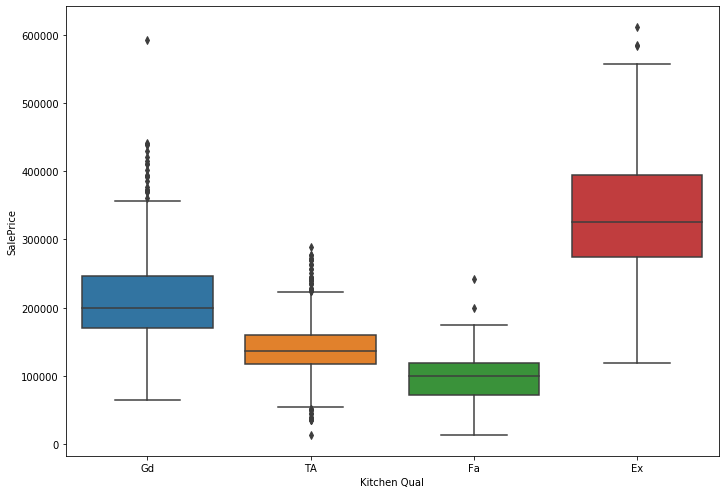

In [101]:
kitchen_qual =sns.boxplot(x='Kitchen Qual', y="SalePrice", data=train)
fig3 = kitchen_qual.get_figure()
fig3.set_size_inches(11.7, 8.27)
fig3.savefig("../Plots/kitchen_qual.png")

We see there's a pretty big difference between the sale's price means according to the quality of the kitchen. We might want to put this feature into the model

<b> Neighborhood

This is most likely to be a very important variable. Intuitively, the price of a house probably, in some manner, relies on what Neighborhood the house is in. We have around 25 neighborhoods so want to explore them a little more in depth.

In [23]:
#Looking to see if Neighborhood is distributed relatively evenly
train['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

The neighborhoods are not distributed evenly but I'm not familiar enough with Ames, Iowa to get rid of some Neighborhoods. We should just be aware that our model might be weighted more towards some neighborhoods. Now we would like to see if statistically, not just intuitively, neighborhood matters.

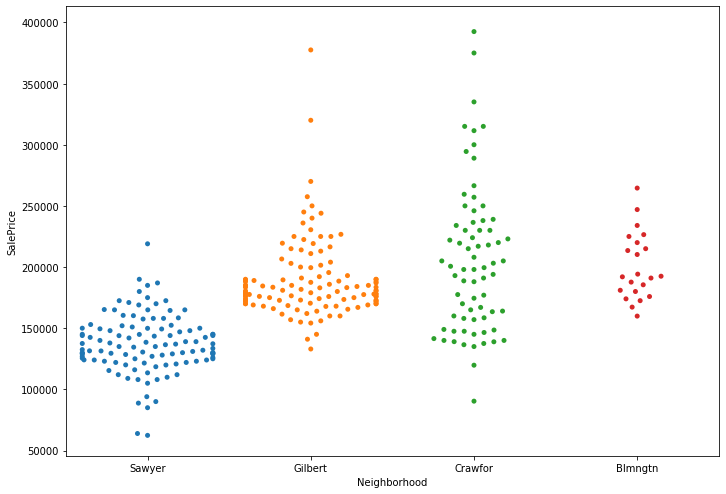

In [102]:
#We will want to look at the Sale Price dependent on Neighborhood. 
#We use the same random sample of neighborhoods as we did above.
swarm = sns.swarmplot(x='Neighborhood', y="SalePrice", data=train[mask]);
fig4 = swarm.get_figure()
fig4.set_size_inches(11.7, 8.27)
fig4.savefig("../Plots/swarm.png")

This plot nicely shows that there is a lot of variability for sale price dependent on the Neighborhood. We can see that some neighborhoods have more observations, some are more spread out, and some have a couple outliers whereas others don't. To emphasize this point, we plot each neighborhood's mean sale price below.

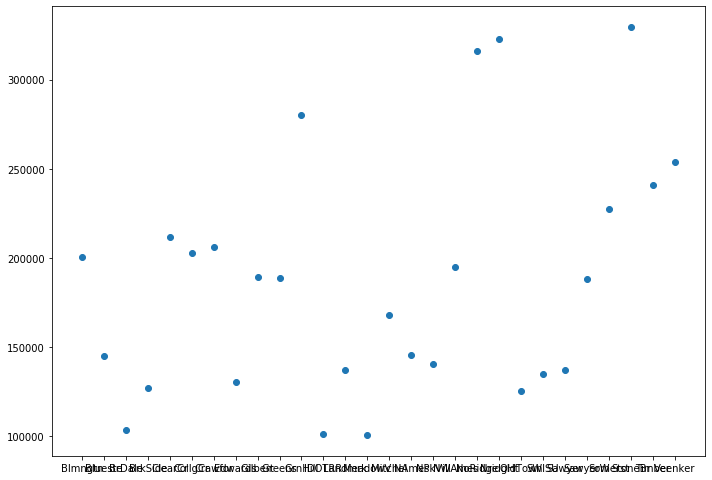

In [103]:
neigh_scatter = plt.scatter(sorted(train['Neighborhood'].unique()),(train.groupby('Neighborhood')['SalePrice'].mean()));
fig5 = neigh_scatter.get_figure()
fig5.set_size_inches(11.7, 8.27)
fig5.savefig("../Plots/neigh_scatter.png")

This plot clearly shows that the means of the Sale price for each neighborhood are all over the place. Similar to month, the mean sale price of each neighborhood looks very scattered. However, the range of mean sale price for neighborhood has a much larger range than month sold, 100,000-350,000. We should certainly keep the neighborhood feature in our model. 

<b> Has pool

In [26]:
#we create a column that is a 1 if the house has a pool and a 0 if it doesn't.
train["Have Pool"] = train["Pool Area"].map(lambda x: 0 if x==0 else 1)

<b> b. Numerical Variables

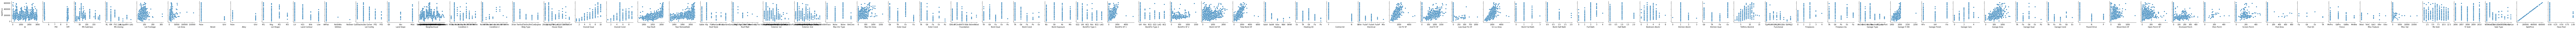

In [27]:
#with the below plots we can see outliers easily so will look into those
sns.pairplot(train, x_vars= train.columns, y_vars=['SalePrice']);

We note that there are many outliers. We will only investigate ones that their variable might go into the model.
- two outliers in lot area and 2 lot frontage
- one outlier for garage cars

In [28]:
train['Lot Area'].sort_values(ascending =False)

471     159000
694     115149
1854     70761
960      63887
745      57200
         ...  
1447      1484
787       1477
53        1476
1544      1470
1510      1300
Name: Lot Area, Length: 2051, dtype: int64

In [29]:
train.loc[471,['Lot Area','Garage Cars','SalePrice']] 
#should remove this bc it doesn't make sense

Lot Area       159000
Garage Cars         2
SalePrice      277000
Name: 471, dtype: object

In [30]:
train.loc[694,['Lot Area','Garage Cars','SalePrice']] 
#should remove this bc it doesn't make sense

Lot Area       115149
Garage Cars         2
SalePrice      302000
Name: 694, dtype: object

In [31]:
train['Lot Frontage'].sort_values(ascending =False) 
#interesting that two highest lot frontage is the same, we also have null values

960     313.0
1335    313.0
1875    200.0
441     195.0
1263    174.0
        ...  
2016      NaN
2022      NaN
2028      NaN
2031      NaN
2047      NaN
Name: Lot Frontage, Length: 2051, dtype: float64

In [32]:
train.loc[960,['Lot Frontage','Garage Cars','SalePrice']] 
#should remove this bc it doesn't make sense

Lot Frontage       313
Garage Cars          2
SalePrice       160000
Name: 960, dtype: object

In [33]:
train.loc[1335,['Lot Frontage','Garage Cars','SalePrice']] 
#should remove this bc it doesn't make sense

Lot Frontage       313
Garage Cars          2
SalePrice       242000
Name: 1335, dtype: object

In [34]:
train['Garage Cars'].sort_values(ascending =False)

925     5.0
337     4.0
332     4.0
289     4.0
1875    4.0
       ... 
356     0.0
1754    0.0
951     0.0
579     0.0
1712    NaN
Name: Garage Cars, Length: 2051, dtype: float64

In [35]:
train.loc[925,['Lot Area','Garage Cars','SalePrice']] 
#should remove this bc it doesn't make sense

Lot Area         8635
Garage Cars         5
SalePrice      126500
Name: 925, dtype: object

In [36]:
#dropped the outliers bc exploratory analysis
train = train.drop([471,694,925, 960, 1335]) 

After dropping the observations that I have deemed are outliers, I will look at the correlation heat map between all of our numerical variables and the target sale price to determine which variables I might want to keep. I've decided to specifically take note of the variables with correlation higher than 0.5

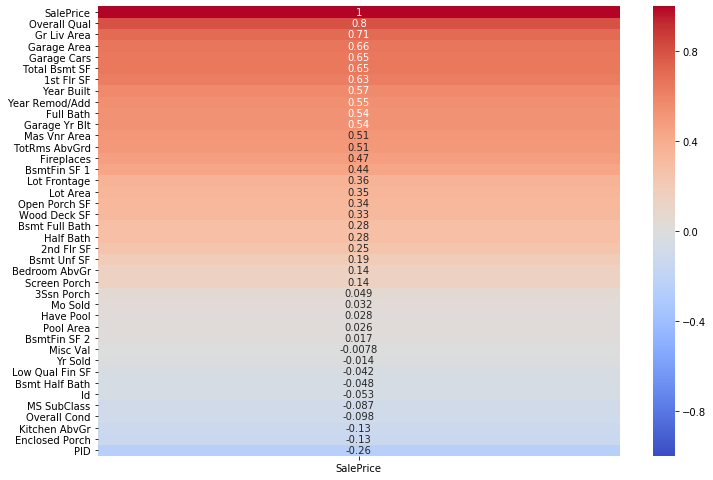

In [104]:
fig, ax = plt.subplots(figsize=(12,12))
heat_map = sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()
fig6= heat_map.get_figure()
fig6.set_size_inches(11.7, 8.27)
fig6.savefig("../Plots/heatmap.png")

In [38]:
#These are our starting numerical features for our model
corr_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool','SalePrice']

In [39]:
#We look at the correlation matrix between these variables to see if we can remove
#any more with good reason
corr_df = train[corr_features]
corr_df.corr()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Garage Yr Blt,Lot Frontage,Mas Vnr Area,TotRms AbvGrd,Have Pool,SalePrice
Overall Qual,1.000000,0.566193,0.564396,0.592367,0.552719,0.475325,0.602799,0.584222,0.514763,0.574946,0.187292,0.436340,0.379136,-0.010334,0.802341
Gr Liv Area,0.566193,1.000000,0.486828,0.497799,0.429098,0.545498,0.258737,0.321922,0.624305,0.288143,0.356059,0.378820,0.815659,0.071490,0.709704
Garage Area,0.564396,0.486828,1.000000,0.896536,0.483407,0.493476,0.491368,0.402596,0.401383,0.554851,0.359628,0.381781,0.339563,0.022570,0.657100
Garage Cars,0.592367,0.497799,0.896536,1.000000,0.447489,0.449185,0.548679,0.447285,0.471700,0.583259,0.317802,0.365081,0.372475,0.018542,0.652858
Total Bsmt SF,0.552719,0.429098,0.483407,0.447489,1.000000,0.802411,0.417569,0.312524,0.331947,0.354161,0.328489,0.399610,0.285656,-0.019526,0.651083
1st Flr SF,0.475325,0.545498,0.493476,0.449185,0.802411,1.000000,0.325911,0.242481,0.370744,0.266461,0.434768,0.383041,0.386409,0.093935,0.631484
Year Built,0.602799,0.258737,0.491368,0.548679,0.417569,0.325911,1.000000,0.629374,0.480149,0.825867,0.111240,0.329515,0.136091,-0.003326,0.573187
Year Remod/Add,0.584222,0.321922,0.402596,0.447285,0.312524,0.242481,0.629374,1.000000,0.470371,0.676103,0.076309,0.208896,0.200204,-0.032531,0.549909
Full Bath,0.514763,0.624305,0.401383,0.471700,0.331947,0.370744,0.480149,0.470371,1.000000,0.503900,0.152861,0.238622,0.520043,0.005505,0.537503
Garage Yr Blt,0.574946,0.288143,0.554851,0.583259,0.354161,0.266461,0.825867,0.676103,0.503900,1.000000,0.070238,0.266983,0.186361,-0.021765,0.536166


We note that Garage Area and Garage Car seem to be highly correlated so will take out Garage Car. Also Year Built and Garage Year Built are highly correlated so we will keep Year built.

<b> Distribution of Numerical Features

In [40]:
def subplot_distribution(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        #ax[i].set_xlabel(list_of_xlabels[i])

/Users/rosedennis/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rosedennis/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


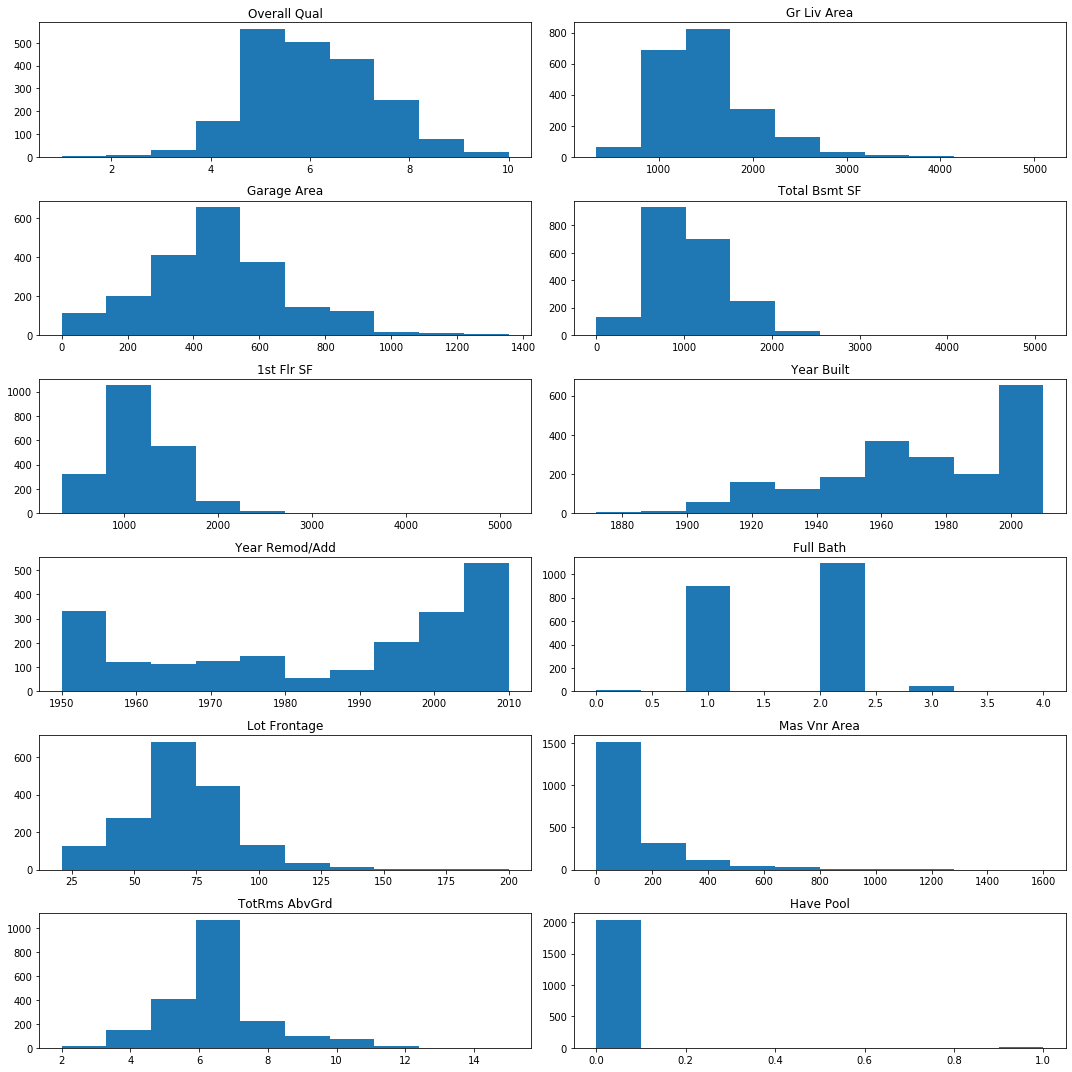

In [41]:
subplot_distribution(train, 
                   ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool'], 
                   ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool'],
                   [])
plt.tight_layout();

We see that most of these numerical values that we chose, are not distributed normally. This could suggest future transformations when modeling.

<b> Relationship of Numerical Features with Sale Price

In [42]:
def subplot_relationship(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column], dataframe['SalePrice']) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('SalePrice')

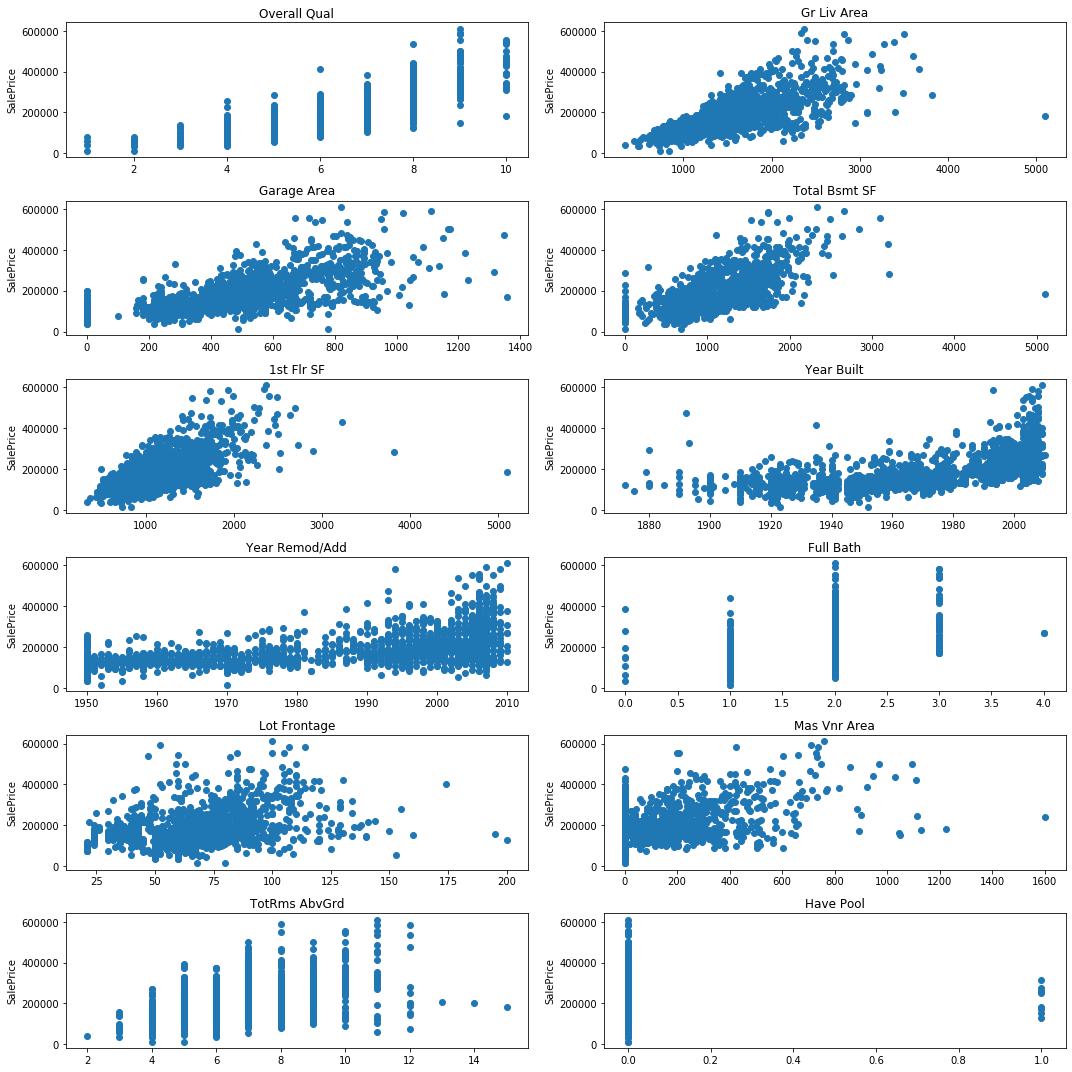

In [43]:
subplot_relationship(train, 
                   ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool'], 
                   ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool'],
                   [])
plt.tight_layout();

This plot shows us that none of these numeric features are really nicely linear with sale price.

## Brief Summary of EDA

Our data is not complete. We have missing values, and unnormal distributions for numerical features. Furthermore, some important categorical variables, like neighborhood and kitchen quality, are not evenly distributed which might vary our model.

We removed 5 observations that we believe to be outliers. We looked at 'SalePrice' distribution and saw that it was right skewed. Therefore, in most of our models, we use the log transform of Sale price.

With these caveats in mind, we can still attempt to model. We will impute numerical missing values with the mean value of the variable and impute categorical missing values with numpy's Nan.

## Model 1: Linear Regression with Numerical Variables and log(SalePrice)

In [44]:
#Creating our new training dataset
train_1_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool','SalePrice']
train_1 = train[train_1_features]
train_1.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Lot Frontage,Mas Vnr Area,TotRms AbvGrd,Have Pool,SalePrice
0,6,1479,475.0,725.0,725,1976,2005,2,NaN,289.0,6,0,130500
1,7,2122,559.0,913.0,913,1996,1997,2,43.0,132.0,8,0,220000
2,5,1057,246.0,1057.0,1057,1953,2007,1,68.0,0.0,5,0,109000
3,5,1444,400.0,384.0,744,2006,2007,2,73.0,0.0,7,0,174000
4,6,1445,484.0,676.0,831,1900,1993,2,82.0,0.0,6,0,138500


In [45]:
#make X 
X1 = train_1.drop('SalePrice', axis =1)
#for modeling to work, we impute missing values with the column's mean
X1 = X1.fillna(X1.mean()) 
#make y
y1= np.log(train_1['SalePrice'])

In [46]:
#Creating the train/test split with 25% test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state =42)
#Implementing a Normal Linear Regression Model
model1 = LinearRegression()
#Fitting the model
model1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#train score
print('The training R^2 score is' , model1.score(X1_train,y1_train))
#test score
print('The testing R^2 score is' , model1.score(X1_test,y1_test))
#cv score
print('The mean cross validation score is' , cross_val_score(model1, X1_train, y1_train, cv =5).mean())

The training R^2 score is 0.8334409982825146
The testing R^2 score is 0.8708266048700957
The mean cross validation score is 0.8256596305342357


This model underfits because the training score is less than the testing score. We will take out the residual plots below.

<b> more metrics

In [48]:
#extra metrics function
def metrics(X,y):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    import pandas as pd
    
    linear = linear_model.LinearRegression()
    model = linear.fit(X, y)
    
    predictions = model.predict(X)
    residuals = y - predictions
    SS_res = sum((residuals)**2)
    SS_tot = sum((y-y.mean())**2)
    MAE = np.abs(residuals).mean()
    MSE = SS_res / len(residuals)
    RMSE = np.sqrt(MSE)
    R2 = 1- ((SS_res)/(SS_tot))
    dof_res = len(y)-len(X.columns)-1
    dof_tot = len(y)-1
    adj_r2 = 1- ((SS_res/dof_res)/(SS_tot/dof_tot))
    
    print( f" Residual sum of squares = {SS_res} ")
    print( f" Total sum of squares = {SS_tot} ")
    print( f" Mean Absolute Error = {MAE} ")
    print( f" Mean Squared Error = {MSE} ")
    print( f" Root Mean Squared Error = {RMSE} ")
    print( f" R^2 = {R2} ")
    print( f" Adjusted R^2 = {adj_r2} ")


In [49]:
metrics(X1, y1)

 Residual sum of squares = 54.29050135391474 
 Total sum of squares = 345.9940635228438 
 Mean Absolute Error = 0.10896276550852864 
 Mean Squared Error = 0.026534946898296552 
 Root Mean Squared Error = 0.16289550914097217 
 R^2 = 0.8430883443457396 
 Adjusted R^2 = 0.842162156511086 


Our adjusted R^2. It is pretty similar to the R^2 which tells us that our model represents about 84% of the variation in SalePrice relative to the mean. 

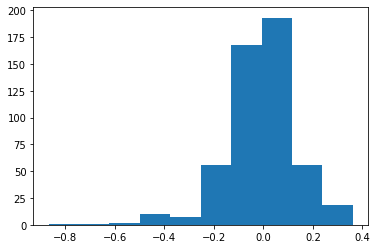

In [50]:
#distribution of residuals
resids1 = y1_test - model1.predict(X1_test)
plt.hist(resids1);

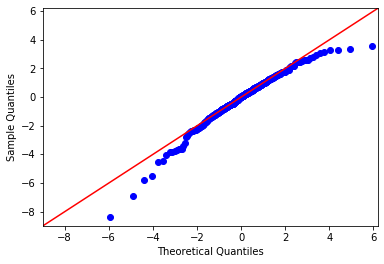

In [51]:
#qq norm plot to check normality of errors
sm.qqplot(resids1 ,stats.t, fit =True , line = '45');

The qq plot tells us that there is something happening on both ends of our model.

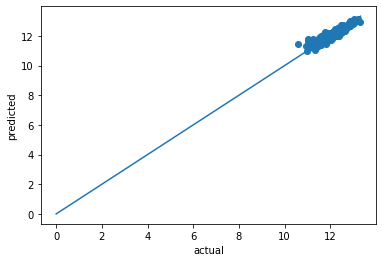

In [52]:
#Residual Plot, actual vs predicted
plt.scatter(y1_test, model1.predict(X1_test));
plt.xlabel('actual'); plt.ylabel('predicted')
#the diagonal line
plt.plot((0,max(y1_train)), (0, max(y1_train) )) 

## Model 2: Linear Regression with Numerical and Categorical Variables with log(SalePrice)

Adding a couple intuitive categorical variables (Neighborhood, Utilities, Bldg Type, Exter Qual, Heating, Central Air, Kitchen Qual, Functional, Garage Qual)

In [53]:
#This training dataset will have both numerical and categorical variables
train_2_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool', 'Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual', 'SalePrice']
train_2 = train[train_2_features]

In [54]:
#Need to get dummies for categorical variables
train_2 = pd.get_dummies(train_2, columns =['Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual'], drop_first=True)
train_2.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Lot Frontage,Mas Vnr Area,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,6,1479,475.0,725.0,725,1976,2005,2,NaN,289.0,...,0,0,0,0,0,1,0,0,0,1
1,7,2122,559.0,913.0,913,1996,1997,2,43.0,132.0,...,0,0,0,0,0,1,0,0,0,1
2,5,1057,246.0,1057.0,1057,1953,2007,1,68.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,5,1444,400.0,384.0,744,2006,2007,2,73.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,6,1445,484.0,676.0,831,1900,1993,2,82.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [55]:
X2 = train_2.drop('SalePrice', axis =1)
X2 = X2.fillna(X2.mean()) #imputing mean
y2=np.log(train_2['SalePrice'])

In [56]:
#Creating the train/test split with 25% test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state =42)
#Implementing a Normal Linear Regression Model
model2 = LinearRegression()
#Fitting the model
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
#train score
print('The training R^2 score is' , model2.score(X2_train,y2_train))
#test score
print('The testing R^2 score is' , model2.score(X2_test,y2_test))
#cv score
print('The mean cross validation score is' , cross_val_score(model2, X2_train, y2_train, cv =5).mean())

The training R^2 score is 0.8869880360337391
The testing R^2 score is 0.8867809825426881
The mean cross validation score is 0.8655960158151753


Based off the train, test, and cv scores, this model performs better than our initial model. We will look at the residuals next.

In [58]:
metrics(X2,y2)

 Residual sum of squares = 37.968331340404816 
 Total sum of squares = 345.9940635228438 
 Mean Absolute Error = 0.09132240644916023 
 Mean Squared Error = 0.01855734669619004 
 Root Mean Squared Error = 0.1362253526190703 
 R^2 = 0.8902630555165638 
 Adjusted R^2 = 0.8865459800461946 


This model is clearly better than our first model because the R^2 is higher. 

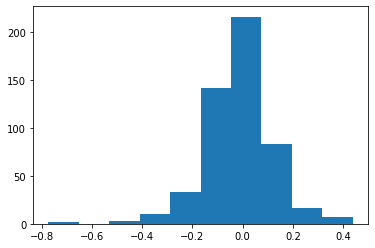

In [59]:
#distribution of residuals
resids2 = y2_test - model2.predict(X2_test)
plt.hist(resids2);

AttributeError: 'NoneType' object has no attribute 'set_size_inches'

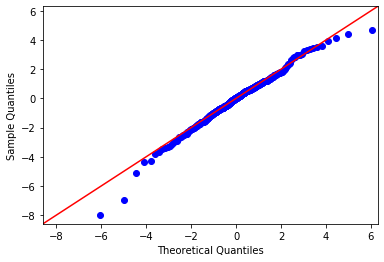

In [107]:
#qq norm plot to check normality of errors--this wont save as a figure but I don't know why
qq_final = sm.qqplot(resids2 ,stats.t, fit =True , line = '45');
fig7 = qq_final.get_figure()
fig7.set_size_inches(11.7, 8.27)
fig7.savefig("../Plots/final_qq.png")

This qq plot looks similar to the one before.

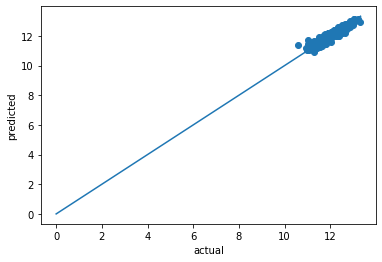

In [61]:
#Residual Plot, actual vs predicted
plt.scatter(y2_test, model2.predict(X2_test));
plt.xlabel('actual'); plt.ylabel('predicted')
#the diagonal line
plt.plot((0,max(y2_train)), (0, max(y2_train) )) 

Looks very similar to the one before.

In [62]:
#Using stats models--shows us the important p-values
X2b_train = sm.add_constant(X2_train)
model2b = sm.OLS(y2_train, X2b_train).fit()

/Users/rosedennis/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [63]:
model2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     174.5
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:23:43   Log-Likelihood:                 844.37
No. Observations:                1534   AIC:                            -1555.
Df Residuals:                    1467   BIC:                            -1197.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.2004      0.765      6.795      0.000       3.699       6.702
Overall Qual             0.0741      0.005     14.452      0.000       0.064       0.084
Gr Liv Area              0.0003   1.81e-05     14.776      0.000       0.000       0.000
Garage Area            8.29e-05    2.9e-05      2.854      0.004    2.59e-05       0.000
Total Bsmt SF            0.0001   1.59e-05      6.738      0.000    7.61e-05       0.000
1st Flr SF           -9.694e-06   1.93e-05     -0.503      0.615   -4.75e-05    2.81e-05
Year Built               0.0013      0.000      4.561      0.000       0.001       0.002
Year Remod/Add           0.0016      0.000      5.613      0.000       0.001       0.002
Full Bath                0.0175      0.011      1.663      0.096      -0.003       0.038
Lot Frontage             0.0005      0.000      1.841      0.066   -3.18e-05       0.001
Mas Vnr Area         -2.548e-06   2.64e-05     -0.096      0.923   -5.44e-05    4.93e-05
TotRms AbvGrd           -0.0101      0.005     -2.174      0.030      -0.019      -0.001
Have Pool                0.0923      0.062      1.499      0.134      -0.028       0.213
Neighborhood_Blueste    -0.0550      0.082     -0.666      0.505      -0.217       0.107
Neighborhood_BrDale     -0.1713      0.058     -2.935      0.003      -0.286      -0.057
Neighborhood_BrkSide    -0.0634      0.046     -1.392      0.164      -0.153       0.026
Neighborhood_ClearCr     0.0860      0.048      1.779      0.075      -0.009       0.181
Neighborhood_CollgCr    -0.0317      0.039     -0.821      0.412      -0.107       0.044
Neighborhood_Crawfor     0.1214      0.043      2.803      0.005       0.036       0.206
Neighborhood_Edwards    -0.1023      0.042     -2.450      0.014      -0.184      -0.020
Neighborhood_Gilbert    -0.0452      0.040     -1.120      0.263      -0.124       0.034
Neighborhood_Greens      0.0935      0.111      0.841      0.400      -0.125       0.312
Neighborhood_GrnHill     0.4575      0.107      4.277      0.000       0.248       0.667
Neighborhood_IDOTRR     -0.1584      0.047     -3.392      0.001      -0.250      -0.067
Neighborhood_Landmrk    -0.0767      0.150     -0.510      0.610      -0.372       0.218
Neighborhood_MeadowV    -0.1374      0.052     -2.643      0.008      -0.239      -0.035
Neighborhood_Mitchel    -0.0164      0.042     -0.392      0.695      -0.098       0.066
Neighborhood_NAmes      -0.0282      0.040     -0.697      0.486      -0.107       0.051
Neighborhood_NPkVill    -0.0461      0.054     -0.849      0.396      -0.153       0.060
Neighborhood_NWAmes     -0.0235      0.043     -0.551      0.582      -0.107       0.060
Neighborhood_NoRidge     0.0510      0.045      1.142      0.254      -0.037       0.139
Neighborhood_NridgHt     0.0719      0.039      1.845    

## Model 3: Polynomial Terms

In [64]:
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X2)


In [65]:
cross_val_score(model2, X_poly, y2, cv=5).mean()


-39397099550.32405

In [66]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_poly, y2, random_state =42)
#Implementing a Normal Linear Regression Model
model3 = LinearRegression()
#Fitting the model
model3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
#train score
print('The training R^2 score is' , model3.score(X3_train,y3_train))
#test score
print('The testing R^2 score is' , model3.score(X3_test,y3_test))
#cv score
print('The mean cross validation score is' , cross_val_score(model3, X3_train, y3_train, cv =5).mean())

The training R^2 score is 0.9705834039949044
The testing R^2 score is -4246065581121.735
The mean cross validation score is -22683.62967197264


This model performs very poorly. This is also hard to interpret so will move onto ridge regression.

## Model 4: Ridge Regression

In [68]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X2, y2, random_state=42)

In [69]:
#Have to scale the X data before fitting a model
ss = StandardScaler()
ss.fit(X4_train)
X4_train = ss.transform(X4_train)
X4_test = ss.transform(X4_test)

In [70]:
model4 = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [71]:
ridge_scores = cross_val_score(model4, X4_train, y4_train, cv=3)
ridge_scores.mean()

0.8644568052642088

This mean cv score is pretty good.

In [72]:
model4.fit(X4_train, y4_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [73]:
#train score
print('The training R^2 score is' , model4.score(X4_train,y4_train))
#test score
print('The testing R^2 score is' , model4.score(X4_test,y4_test))
#cv score
print('The mean cross validation score is' , cross_val_score(model4, X4_train, y4_train, cv =5).mean())

The training R^2 score is 0.8869314366712253
The testing R^2 score is 0.8870018378120158
The mean cross validation score is 0.8659768682476301


These are all pretty strong scores. However, keep in mind that although this model might perform better, it would be harder to interpret because we have scalled all of the X variables.

In [74]:
pred4 = model4.predict(X4_test)

In [75]:
r2_score(y4_test, pred4)

0.8870018378120159

This is a very good R^2 score.

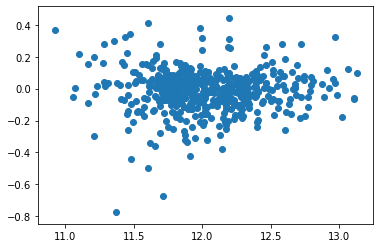

In [76]:
resids4 = y4_test - pred4
plt.scatter(pred4, resids4)

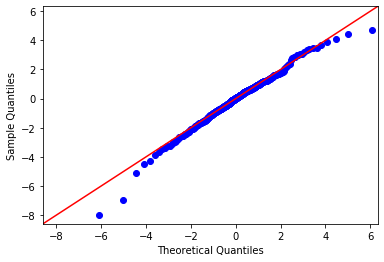

In [77]:
#qq norm plot to check normality of errors
sm.qqplot(resids4 ,stats.t, fit =True , line = '45');

## Model 5: Lasso Regression

In [78]:
model5 = LassoCV(n_alphas=200)

In [79]:
lasso_scores = cross_val_score(model5, X4_train, y4_train, cv=3)
lasso_scores.mean()

/Users/rosedennis/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/rosedennis/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/rosedennis/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8662166897909569

In [80]:
model5.fit(X4_train, y4_train)

/Users/rosedennis/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [81]:
model5.score(X4_train, y4_train)

0.8857247384764353

In [82]:
model5.score(X4_test, y4_test)

0.8874261480897992

In [83]:
pred5 = model5.predict(X4_test)


In [84]:
resids5 = y4_test - pred5


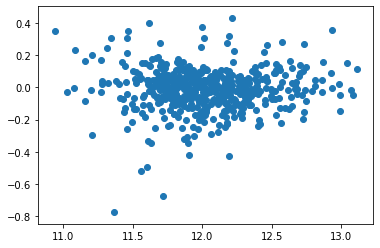

In [85]:
plt.scatter(pred5, resids5)


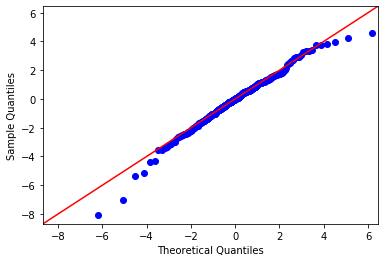

In [86]:
#qq norm plot to check normality of errors
sm.qqplot(resids5 ,stats.t, fit =True , line = '45');

## Final Model and Interpretation

Our final model is model 2. This is simply because it has the highest R^2 scores AND is easy to interpret. Our model uses the following features.
- Overall Qual
- Gr Liv Area 
- Garage Area 
- Total Bsmt SF 
- 1st Flr SF
- Year Built 
- Year Remod/Add 
- Full Bath
- Lot Frontage 
- Mas Vnr Area 
- TotRms AbvGrd
- Have Pool
- Neighborhood 
- Utilities
- Bldg Type 
- Exter Qual 
- Heating
- Central Air 
- Kitchen Qual
- Functional
- Garage Qual

In [87]:
X2.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Lot Frontage,Mas Vnr Area,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,6,1479,475.0,725.0,725,1976,2005,2,68.782305,289.0,...,0,0,0,0,0,1,0,0,0,1
1,7,2122,559.0,913.0,913,1996,1997,2,43.000000,132.0,...,0,0,0,0,0,1,0,0,0,1
2,5,1057,246.0,1057.0,1057,1953,2007,1,68.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
3,5,1444,400.0,384.0,744,2006,2007,2,73.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
4,6,1445,484.0,676.0,831,1900,1993,2,82.000000,0.0,...,0,0,0,0,0,1,0,0,0,1


Below I will create a dictionary with the key being the variable names $X_i$ and the values their respective $\beta_i$ coefficients

In [88]:
#Thank you stack overflow
#https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
coef_dict = {}
for coef, feat in zip(model2.coef_,train_2_features):
    coef_dict[feat] = coef

In [89]:
coef_dict

{'Overall Qual': 0.0741417535048953,
 'Gr Liv Area': 0.0002680510925050589,
 'Garage Area': 8.290063459460832e-05,
 'Total Bsmt SF': 0.00010737328603880355,
 '1st Flr SF': -9.693997185290792e-06,
 'Year Built': 0.0013450311167440972,
 'Year Remod/Add': 0.0015652001773315584,
 'Full Bath': 0.017467079735272513,
 'Lot Frontage': 0.0004855044750051024,
 'Mas Vnr Area': -2.5475574057520767e-06,
 'TotRms AbvGrd': -0.0100823015595287,
 'Have Pool': 0.09231415192580715,
 'Neighborhood': -0.0549507141670715,
 'Utilities': -0.17133118356810453,
 'Bldg Type': -0.06342464194852175,
 'Exter Qual': 0.08601390876854151,
 'Heating': -0.03169112297102195,
 'Central Air': 0.12138385880809605,
 'Kitchen Qual': -0.10227439523645387,
 'Functional': -0.0452127272482925,
 'Garage Qual': 0.09350752597269499,
 'SalePrice': 0.45747622324597786}

These coefficients tell us that no one variable has an extreme impact on Sale price. We see that overall quality, Full bath, TotRms AbvGrd, have pool, Neighborhood, Utilities, Bldg Type, Exter Qual, Heating, Central Air, Functional, Garage Qual have the most effect on the sale price. However, this doesn't show all of our dummy variables. The following code will show this and we hope to see that a couple neighborhoods have a larger $\beta_i$

In [90]:
model2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     174.5
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:23:53   Log-Likelihood:                 844.37
No. Observations:                1534   AIC:                            -1555.
Df Residuals:                    1467   BIC:                            -1197.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.2004      0.765      6.795      0.000       3.699       6.702
Overall Qual             0.0741      0.005     14.452      0.000       0.064       0.084
Gr Liv Area              0.0003   1.81e-05     14.776      0.000       0.000       0.000
Garage Area            8.29e-05    2.9e-05      2.854      0.004    2.59e-05       0.000
Total Bsmt SF            0.0001   1.59e-05      6.738      0.000    7.61e-05       0.000
1st Flr SF           -9.694e-06   1.93e-05     -0.503      0.615   -4.75e-05    2.81e-05
Year Built               0.0013      0.000      4.561      0.000       0.001       0.002
Year Remod/Add           0.0016      0.000      5.613      0.000       0.001       0.002
Full Bath                0.0175      0.011      1.663      0.096      -0.003       0.038
Lot Frontage             0.0005      0.000      1.841      0.066   -3.18e-05       0.001
Mas Vnr Area         -2.548e-06   2.64e-05     -0.096      0.923   -5.44e-05    4.93e-05
TotRms AbvGrd           -0.0101      0.005     -2.174      0.030      -0.019      -0.001
Have Pool                0.0923      0.062      1.499      0.134      -0.028       0.213
Neighborhood_Blueste    -0.0550      0.082     -0.666      0.505      -0.217       0.107
Neighborhood_BrDale     -0.1713      0.058     -2.935      0.003      -0.286      -0.057
Neighborhood_BrkSide    -0.0634      0.046     -1.392      0.164      -0.153       0.026
Neighborhood_ClearCr     0.0860      0.048      1.779      0.075      -0.009       0.181
Neighborhood_CollgCr    -0.0317      0.039     -0.821      0.412      -0.107       0.044
Neighborhood_Crawfor     0.1214      0.043      2.803      0.005       0.036       0.206
Neighborhood_Edwards    -0.1023      0.042     -2.450      0.014      -0.184      -0.020
Neighborhood_Gilbert    -0.0452      0.040     -1.120      0.263      -0.124       0.034
Neighborhood_Greens      0.0935      0.111      0.841      0.400      -0.125       0.312
Neighborhood_GrnHill     0.4575      0.107      4.277      0.000       0.248       0.667
Neighborhood_IDOTRR     -0.1584      0.047     -3.392      0.001      -0.250      -0.067
Neighborhood_Landmrk    -0.0767      0.150     -0.510      0.610      -0.372       0.218
Neighborhood_MeadowV    -0.1374      0.052     -2.643      0.008      -0.239      -0.035
Neighborhood_Mitchel    -0.0164      0.042     -0.392      0.695      -0.098       0.066
Neighborhood_NAmes      -0.0282      0.040     -0.697      0.486      -0.107       0.051
Neighborhood_NPkVill    -0.0461      0.054     -0.849      0.396      -0.153       0.060
Neighborhood_NWAmes     -0.0235      0.043     -0.551      0.582      -0.107       0.060
Neighborhood_NoRidge     0.0510      0.045      1.142      0.254      -0.037       0.139
Neighborhood_NridgHt     0.0719      0.039      1.845    

Pulling some important things out of this model summary. It seems that no variable has a huge impact on Sale's price. The betas are all on the magnitude < 1. Overall Qual, Gr Liv Area, Garage Area, Total Bsmt SF, Year Built, Year Remod/Add, TotRms AbvGrd, various neighborhoods, some Bldg Types, Exter Qual_Fa, Kitchen Qual, and Garage Qual are all significant predictors. Again, I'm most interested in Neighborhood so I will look further into those. It seems like the neighborhood Grn Hill has the highest Beta coefficient while also having a significant p-value. However, it's still pretty small being 0.4575. One reason why is because we have to exponentiate the beta because we log transformed sale price in our model. This says, that all else being held equal, the sale price of a house in Green Hill is about 45% more expensive than the next highest neighborhood, Greens.

After some research, Green Hill is a retirement home. This is probably why it's more expensive.

Another important feature to consider when we look at Sale price of a house is the overall quality rating. This seems to very significant indicating that for one unit increase in the overall quality, the sale price increase by about 7%. This would be pretty interesting to delve further into. The overall quality is on a range from 0 to 10 and I'm curious to see what questions go into the overall quality.

It's also interesting to note some of the negative betas. For example, the feature 'total rooms above ground' has a significant p value and a beta coefficient of -0.01. I think this would make sense in certain neighborhoods. You'd think that in an affluent neighborhood, more rooms would mean more expensive. However in a not-so-affluent neighborhood, more rooms might mean that multiple families live there therefore making the sale price decrease.

## Kaggle Competition

In [91]:
test["Have Pool"] = test["Pool Area"].map(lambda x: 0 if x==0 else 1)

test_kaggle_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool', 'Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual']
test_kaggle = test[test_kaggle_features]
test_kaggle = pd.get_dummies(test_kaggle, columns =['Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual'], drop_first=True)
test_kaggle = test_kaggle.fillna(test_kaggle.mean())

We note that sometimes, the training set may have more columns than the test set because of dummying. ie if A neighborhood exists in the train but not test, the train will have one more column than the test.

In [92]:
# Get missing columns in the training test
missing_cols = set( X2_train.columns ) - set( test_kaggle.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_kaggle[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_kaggle = test_kaggle[X2_train.columns]

In [93]:
kaggle_preds = np.exp(model2.predict(test_kaggle))

In [95]:
#output to csv
top_kaggle = pd.DataFrame( {'Id':test['Id']})
top_kaggle['SalePrice'] = kaggle_preds
top_kaggle.to_csv('../Submissions/top_kaggle_submission.csv', index = False)

## Conclusions and Recommendations

Remember that we want to present our model to real estate agents or house flippers. We ignore the more complex models and only use an OLS linear model with selected features and a log transform on Sale Price. We can say that our model explains about 89% of the variation in y relative to its mean. In the future, we might want to creat an interaction term between Neighborhood and Total Rooms above ground.